Original Images


C:\Users\power\AppData\Local\Temp\ipykernel_23360\3347117914.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = np.array(Image.fromarray(image_list[k]).resize((100, 100), Image.ANTIALIAS))


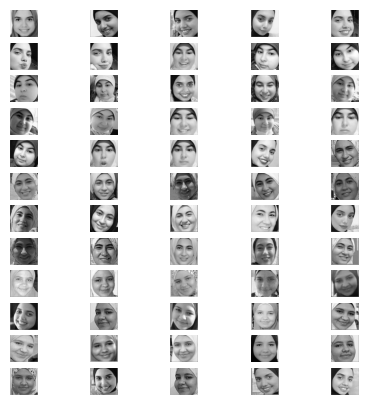

C:\Users\power\AppData\Local\Temp\ipykernel_23360\3347117914.py:43: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))


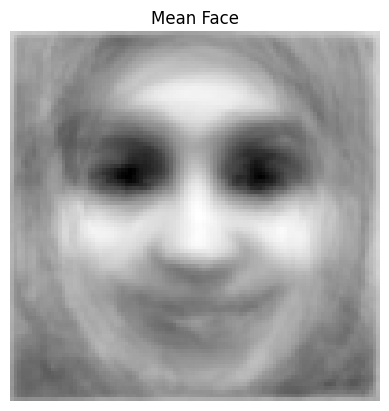

Zero mean faces


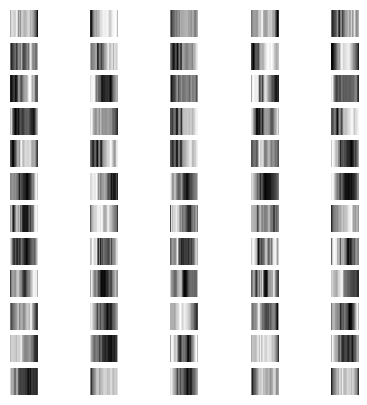

eigenfaces


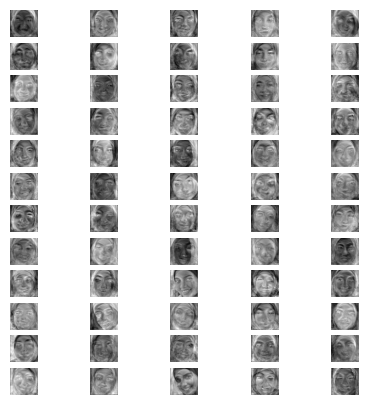

In [1]:
from PIL import Image
import glob
import numpy as np
from numpy import linalg as la
from pylab import *
import matplotlib.pyplot as plt 

image=[]
flattened_images  =[]
def griddisplay(image_list):
    rows = int(len(image_list) / 5) 
    fig1, axes_array = plt.subplots(rows, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(rows):
        for col in range(5):    
            im = np.array(Image.fromarray(image_list[k]).resize((100, 100), Image.ANTIALIAS))
            axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()
   
for filename in glob.glob(r'C:\Users\power\Desktop\cv-task5\AllData\TrainingImages\*.jpg'):
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    image.append(im)

TrainImages_num = len(image)


print('Original Images')
griddisplay(image)


for i in range(TrainImages_num):
    p=image[i].flatten()
    flattened_images.append(p)
A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

mean= np.mean(A,1)
b= mean.reshape(128,128)
resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))
imshow(resized_mean,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean Face')
plt.show()


zero_mean =[]
column =0
Zero_mean_matrix= np.ones((16384,TrainImages_num))
for values in flattened_images:
    zm= A[:,column] - mean         # zm = values - mean
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.reshape(128,128)
    zero_mean.append(zm)
    column = column +1
print('Zero mean faces')
griddisplay(zero_mean)

d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/425
u_list =[]
w2, v2 = la.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)                        
    u = u / np.linalg.norm(u)
    u_i= u.reshape(128,128)
    u_list.append(u_i)

print('eigenfaces')
griddisplay(u_list)


		k=39


C:\Users\power\AppData\Local\Temp\ipykernel_23360\3347117914.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = np.array(Image.fromarray(image_list[k]).resize((100, 100), Image.ANTIALIAS))


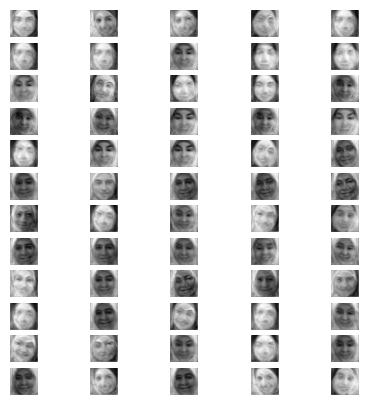

In [30]:
dict ={}
def Reconstruct(k, boolean):
    weights=np.zeros((TrainImages_num,k))
    matrixU = np.zeros((16384,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    rec_face=[]
    for face_num in range(0,TrainImages_num):
        w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
        weights[face_num,:] =w

        face = np.dot(w, np.transpose(matrixU))
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        face = face+np.transpose(mean)
        reshape_face = face.reshape(128,128)
        rec_face.append( reshape_face)
    if boolean is True:
        griddisplay(rec_face)
    dict[k] = weights

# print('\t\tk=2')
# Reconstruct(2,True)
# print('\t\tk=5')
# Reconstruct(5,True)
print('\t\tk=39')
Reconstruct(39,True)


		k=39


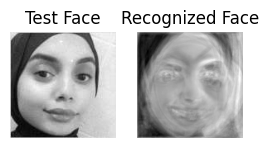

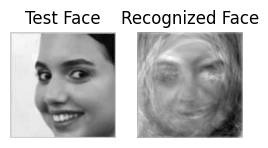

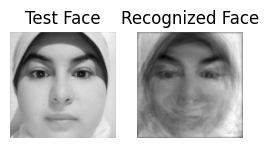

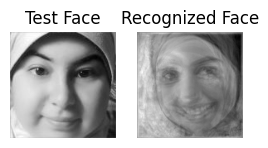

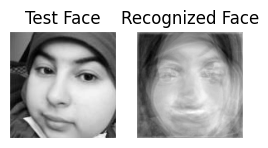

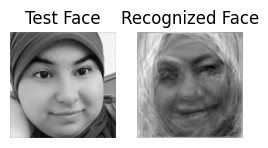

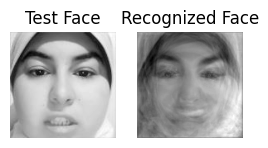

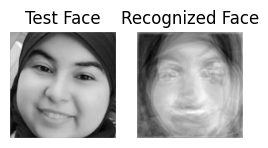

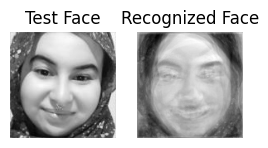

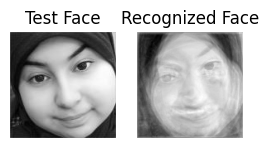

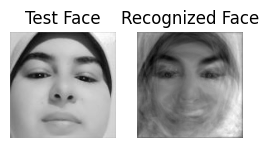

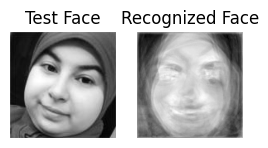

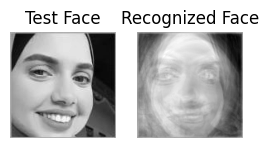

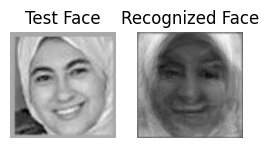

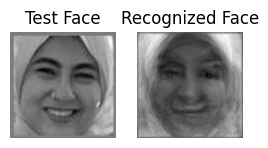

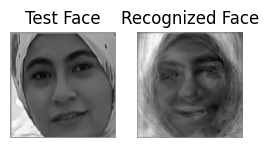

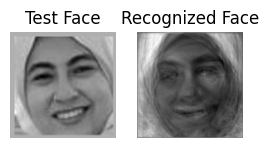

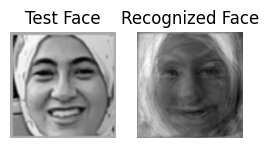

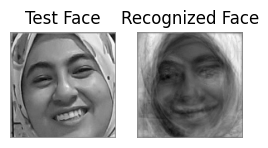

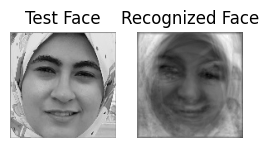

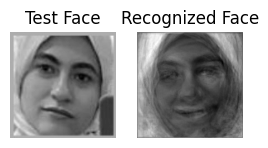

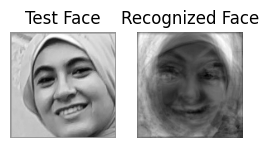

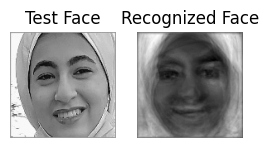

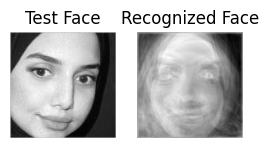

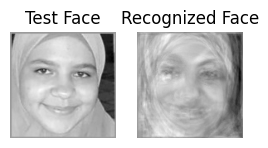

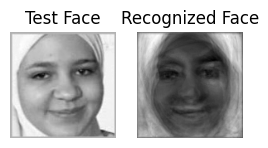

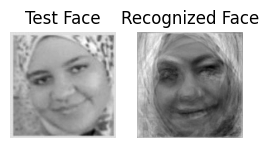

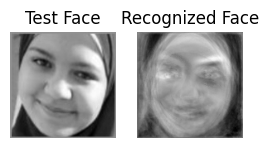

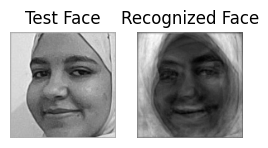

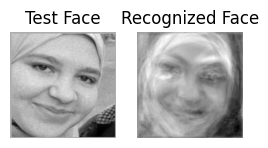

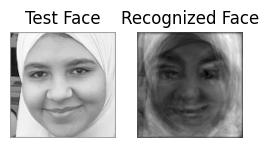

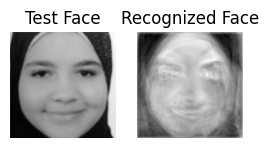

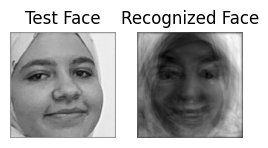

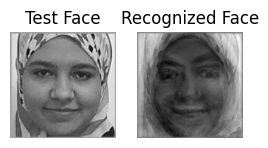

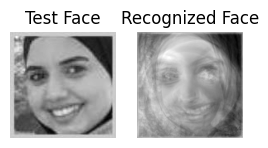

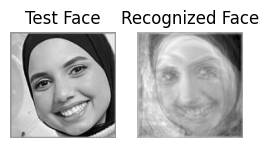

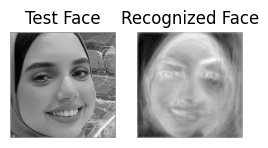

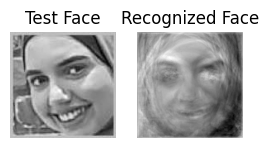

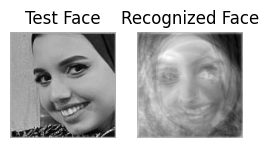

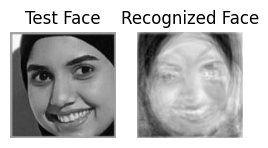

In [42]:
test_images=[]
for filename in glob.glob(r'C:\Users\power\Desktop\cv-task5\AllData\TestingImages\*.jpg'):
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    test_images.append(im)
    
def Project(k,zero_mean_test,threshold):
    matrixU = np.zeros((16384,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    original_w_k =dict[k]
    dist =[]
    for wt_vectors in original_w_k:
        dist.append(np.linalg.norm(wt_vectors-w.T))

    nearest_face = np.argmin(dist)
    nearest_face_weights = original_w_k[nearest_face]
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(mean)
    zero_mean_test = zero_mean_test.reshape(128,128)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(mean)
    reshape_face = face.reshape(128,128)
    if np.min(dist) < threshold:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Recognized Face')
    plt.show()
    
def runs(k):
    for num in range(0,len(test_images)) :#t in test_images:
        t = test_images[num]
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        Project(k,zero_mean_test,80)  #threshold =80

# runs(2)
# print('\t\tk=5')
# runs(5)
print('\t\tk=39')
runs(39)

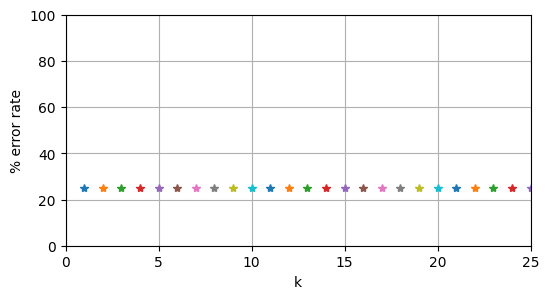

In [55]:
def Error(k,threshold):
    Nonfaces = 10
    total_images = 40
    nf_detected = 0
    matrixU = np.zeros((16384,k))
    c = 0
    
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    
    for t in test_images:
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
        original_w_k =dict[k]
        dist =[]
        for wt_vectors in original_w_k:
            dist.append(np.linalg.norm(wt_vectors-w.T))
        
        if np.min(dist) > threshold:
            nf_detected = nf_detected + 1

    
    error_percentage = ((Nonfaces - nf_detected)/total_images) *100
    return error_percentage

xt =[]
for x in range(1,40):
    Reconstruct(x,False)
    xt.append(x)


fig, axes1 = plt.subplots(1, 1)
fig.set_size_inches(6,3)
for x_pts in xt:
    y= Error(x_pts,80)
    axes1.plot(x_pts, y,marker='*')
axes1.set(xlabel="k",ylabel="% error rate",ylim=(0,100),xlim=(0,25))
plt.grid(True)
plt.show()
